In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('glcm_features.csv')
list_1 = []
length = len(df['Text'])
array_2 = np.array(df['Text'])

for i in range(0, length):
    if array_2[i] < 2.3 :
        list_1.append(1)
    elif array_2[i] > 2.3 and array_2[i] < 3.6 :
        list_1.append(2)
    else:
        list_1.append(3)
        
df['state'] = list_1
#df.drop(['Text'], axis = 1, inplace = True)
df.drop(['Text','RadId'], axis = 1, inplace = True)
df.head()

#df.corr()

,lndbId,FindingId,contrast,energy,dissimilarity,homogeneity,correlation,ASM,Nodule,state
0,1,1,0.014103,0.934866,0.014103,0.992949,0.874222,0.873974,1,3
1,1,2,0.010256,0.966344,0.010256,0.994872,0.816942,0.933821,1,3
2,1,1,0.010256,0.958256,0.010256,0.994872,0.856743,0.918254,1,3
3,1,1,0.011538,0.966321,0.011538,0.994231,0.789518,0.933775,1,3
4,2,1,0.010256,0.953933,0.010256,0.994872,0.871572,0.909988,1,3


In [24]:
Y = df['state']

In [25]:
X = df.drop(['lndbId','FindingId'], axis = 1)
#X = df.drop(['Text'], axis = 1)
#X = df[['Nodule']]



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)
X_train.corr()


,contrast,energy,dissimilarity,homogeneity,correlation,ASM,Nodule,state
contrast,1.000000,-0.920242,1.000000,-1.000000,0.472398,-0.934281,0.542278,0.439673
energy,-0.920242,1.000000,-0.920242,0.920242,-0.366826,0.998206,-0.331631,-0.245678
dissimilarity,1.000000,-0.920242,1.000000,-1.000000,0.472398,-0.934281,0.542278,0.439673
homogeneity,-1.000000,0.920242,-1.000000,1.000000,-0.472398,0.934281,-0.542278,-0.439673
correlation,0.472398,-0.366826,0.472398,-0.472398,1.000000,-0.388267,0.621231,0.538122
ASM,-0.934281,0.998206,-0.934281,0.934281,-0.388267,1.000000,-0.355669,-0.265101
Nodule,0.542278,-0.331631,0.542278,-0.542278,0.621231,-0.355669,1.000000,0.901882
state,0.439673,-0.245678,0.439673,-0.439673,0.538122,-0.265101,0.901882,1.000000


In [27]:
X_train.drop(['ASM','energy','state','dissimilarity','contrast'], axis = 1, inplace = True)
X_test.drop(['ASM','energy','state','dissimilarity','contrast'], axis = 1, inplace = True)

C:\Users\Ishan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
### KNN classifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)
print('Accuracy : ', accuracy)
print('F1 score : ', f_score)
print('Confusion matrix : \n', conf_mat)


Accuracy :  0.9025270758122743
F1 score :  0.875942463207215
Confusion matrix : 
 [[ 84   0   8]
 [  0   0  16]
 [  3   0 166]]


In [29]:
### SVM classifier

from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)
print('Accuracy : ', accuracy)
print('F1 score : ', f_score)
print('Confusion matrix : \n', conf_mat)


Accuracy :  0.9133574007220217
F1 score :  0.8866922813309713
Confusion matrix : 
 [[ 84   0   8]
 [  0   0  16]
 [  0   0 169]]


In [30]:
### logistic regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 12).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)
print('Accuracy : ', accuracy)
print('F1 score : ', f_score)
print('Confusion matrix : \n', conf_mat)

Accuracy :  0.9133574007220217
F1 score :  0.8866922813309713
Confusion matrix : 
 [[ 84   0   8]
 [  0   0  16]
 [  0   0 169]]


In [31]:
### decision tree

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)
print('Accuracy : ', accuracy)
print('F1 score : ', f_score)
print('Confusion matrix : \n', conf_mat)

Accuracy :  0.8844765342960289
F1 score :  0.8655551289301103
Confusion matrix : 
 [[ 85   1   6]
 [  0   1  15]
 [  9   1 159]]


In [32]:
### Naive baye's

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)
print('Accuracy : ', accuracy)
print('F1 score : ', f_score)
print('Confusion matrix : \n', conf_mat)

Accuracy :  0.9097472924187726
F1 score :  0.8848901830691285
Confusion matrix : 
 [[ 84   0   8]
 [  0   0  16]
 [  0   1 168]]


In [33]:
### Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)
print('Accuracy : ', accuracy)
print('F1 score : ', f_score)
print('Confusion matrix : \n', conf_mat)

Accuracy :  0.9133574007220217
F1 score :  0.8866922813309713
Confusion matrix : 
 [[ 84   0   8]
 [  0   0  16]
 [  0   0 169]]


In [16]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 2) 
  
# Training the model 
extra_tree_forest.fit(X_train, y_train) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

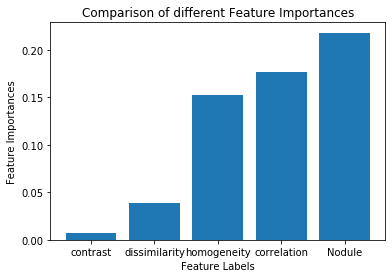

In [19]:
# Plotting a Bar Graph to compare the features
plt.bar(X_train.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 